# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

Define and plot a quartic function

In [3]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [4]:
print(x.size())
print(y.size())

torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

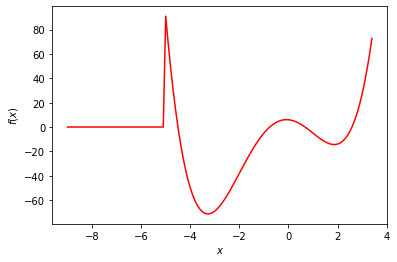

In [5]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [7]:
import torch

H1 = 40 # number of hidden neurons
H2 = 20
H3 = 20

Niter = 5*10**4

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    


999 12.529759407043457
1999 0.3511583209037781
2999 1.615509271621704
3999 1.8971104621887207
4999 0.039474766701459885
5999 0.998198390007019
6999 1.739135503768921
7999 7.726044178009033
8999 0.018778905272483826
9999 0.02858152985572815
10999 0.022187938913702965
11999 0.12707310914993286
12999 0.12130101025104523
13999 0.06714482605457306
14999 0.0496104434132576
15999 0.1962437778711319
16999 0.5345607399940491
17999 0.04767648130655289
18999 0.26930859684944153
19999 0.04556373506784439
20999 0.14786890149116516
21999 0.2958981692790985
22999 0.6154854893684387
23999 0.26591503620147705
24999 91.47941589355469
25999 0.755328357219696
26999 2.1903457641601562
27999 0.0370880588889122
28999 0.09691573679447174
29999 0.056955449283123016
30999 0.6837992668151855
31999 0.21461668610572815
32999 0.5891489386558533
33999 4.332010269165039
34999 0.08315803855657578
35999 0.08748467266559601
36999 0.07008049637079239
37999 62.71533203125
38999 0.10816221684217453
39999 0.2234803736209869

Plot the training error as a function of the epoch

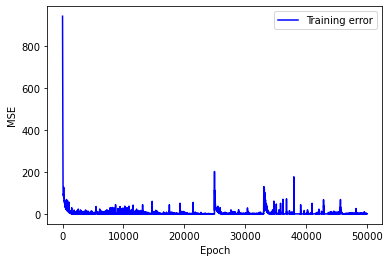

In [8]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

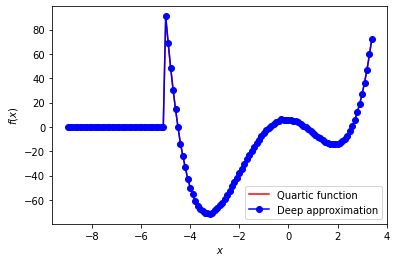

tensor(0.0682, grad_fn=<MseLossBackward>)


In [9]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()
print(loss_fn(y_pred,y))

How many parameters?

In [10]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [11]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



Print all the parameters (just for seeing them)

In [13]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.0293],
        [ 0.1662],
        [ 0.2507],
        [ 0.0148],
        [ 0.5880],
        [-0.1453],
        [ 0.7213],
        [ 0.7799],
        [ 0.1694],
        [ 0.0020],
        [-0.0947],
        [ 0.1099],
        [ 0.6219],
        [-0.2070],
        [ 0.4452],
        [ 0.0243],
        [ 0.2697],
        [ 0.1809],
        [ 0.3077],
        [ 0.4606],
        [-0.2609],
        [-0.1501],
        [ 0.4798],
        [-0.0443],
        [ 0.6392],
        [-0.0943],
        [ 0.0124],
        [ 0.0024],
        [-0.4017],
        [ 0.4299],
        [ 0.2167],
        [ 0.7928],
        [ 0.1323],
        [ 0.5954],
        [-0.0093],
        [-0.5359],
        [ 0.4683],
        [ 0.4556],
        [-0.5617],
        [-0.1289]], requires_grad=True)
Parameter containing:
tensor([-0.1007, -0.6010,  0.9409, -0.2379, -2.0306, -1.3265, -1.6990, -1.6012,
        -0.2199, -0.0127, -0.1251, -0.3775,  0.2093, -1.7810, -1.5404, -0.0886,
         0.7159

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [15]:
H1 = 5000 # number of hidden neurons

Niter = 50*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

999 89.91154479980469
1999 65.68263244628906
2999 55.85248947143555
3999 48.98550033569336
4999 42.870689392089844
5999 35.199790954589844
6999 31.576419830322266
7999 27.381654739379883
8999 44.5291748046875
9999 22.901227951049805
10999 21.261085510253906
11999 19.82634735107422
12999 21.904254913330078
13999 18.138206481933594
14999 16.591632843017578
15999 16.2703800201416
16999 15.096288681030273
17999 38.03791809082031
18999 15.974079132080078
19999 13.957817077636719
20999 12.872574806213379
21999 12.356800079345703
22999 11.88097858428955
23999 11.427764892578125
24999 11.17879867553711
25999 11.54541015625
26999 10.153220176696777
27999 9.809215545654297
28999 9.42617416381836
29999 9.053194999694824
30999 8.723050117492676
31999 8.417707443237305
32999 8.327995300292969
33999 7.863206386566162
34999 9.606839179992676
35999 7.746954917907715
36999 7.937745571136475
37999 6.782647609710693
38999 6.562563419342041
39999 6.35268497467041
40999 7.614356517791748
41999 5.9518742561

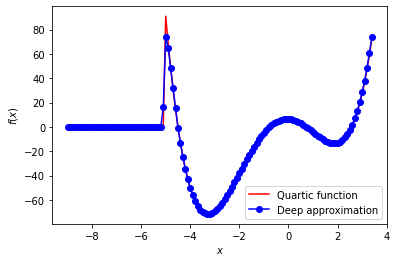

tensor(4.9363, grad_fn=<MseLossBackward>)


In [16]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()
print(loss_fn(y_pred,y))

In [17]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 15001

